In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt_card_resident=pd.read_csv('C:/bigcontest/data/shinhan_card/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', delimiter = '\t')

In [3]:
dt_card_resident.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [4]:
dt_card_resident.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194
2537752,20200531,350,720,81,M,65,5,29


In [5]:
dt_card_resident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


In [6]:
dt_card_resident.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

# STD_DD 기준일자

In [7]:
dt_card_resident.STD_DD.unique()
dt_card_resident.STD_DD.value_counts()

20190427    11915
20190504    11903
20190309    11869
20200523    11802
20190511    11800
            ...  
20200315     8031
20200308     7882
20200223     7834
20200301     7625
20190205     6710
Name: STD_DD, Length: 241, dtype: int64

# GU_CD 구 코드

140 - 서울 중구  
350 - 서울 노원구  
110 - 대구 중구  
260 - 대구 수성구

In [8]:
dt_card_resident.GU_CD.unique()
dt_card_resident.GU_CD.value_counts()

350    761412
260    746820
140    667106
110    362415
Name: GU_CD, dtype: int64

# DONG_CD 동 코드

In [9]:
dt_card_resident.DONG_CD.unique()
dt_card_resident.DONG_CD.value_counts()

670    144986
640    127335
550    108809
680    105980
540    103374
570     97804
595     94899
580     94525
520     91711
590     89509
625     81089
630     80088
560     69696
665     62836
565     60065
650     57814
695     53205
575     49697
600     48723
605     48695
545     44764
615     43799
690     43572
651     41552
619     39166
621     38954
611     38483
624     37937
510     36796
635     36593
602     35544
561     33169
700     32201
610     32091
620     30731
652     30579
720     29328
710     29018
517     28247
530     27521
645     26585
612     24990
662     24352
661     23441
601     21333
585     19767
660     16400
Name: DONG_CD, dtype: int64

# MCT_CAT_CD 업종코드

In [10]:
dt_card_resident.MCT_CAT_CD.unique()
dt_card_resident.MCT_CAT_CD.value_counts()

40    326560
80    326471
81    291322
70    280001
71    211651
21    158288
33    143343
50    122479
62    111545
22     99595
42     94797
92     70101
20     67506
10     58095
44     50400
52     29515
35     26769
34     24659
32     16120
43     13810
60      6666
30      6102
31      1958
Name: MCT_CAT_CD, dtype: int64

# SEX_CD 성별 코드

In [11]:
dt_card_resident.SEX_CD.unique()
dt_card_resident.SEX_CD.value_counts()

M    1295256
F    1242497
Name: SEX_CD, dtype: int64

# AGE_CD 나이 코드

In [12]:
dt_card_resident.AGE_CD.unique()
dt_card_resident.AGE_CD.value_counts()

45    287695
50    280996
40    269982
25    264405
35    263903
30    256633
55    252090
65    221656
60    220820
20    219573
Name: AGE_CD, dtype: int64

# USE_CNT 이용건수

In [13]:
dt_card_resident.USE_CNT.unique()
dt_card_resident.USE_CNT.value_counts()

5        469236
9        164783
11       143280
4         82974
6         80148
          ...  
15402         1
7214          1
5167          1
23589         1
6147          1
Name: USE_CNT, Length: 7507, dtype: int64

In [14]:
dt_card_resident.groupby('AGE_CD')['USE_AMT'].sum()

AGE_CD
20    345604059
25    746116992
30    726108683
35    790366967
40    756676736
45    882011212
50    793963553
55    596300453
60    430390045
65    495977349
Name: USE_AMT, dtype: int64

In [15]:
dt_card_resident.groupby('SEX_CD')['USE_AMT'].sum()

SEX_CD
F    3289378278
M    3274137771
Name: USE_AMT, dtype: int64

In [16]:
dt_card_resident.groupby(['SEX_CD','AGE_CD','MCT_CAT_CD'])['USE_AMT'].count()

SEX_CD  AGE_CD  MCT_CAT_CD
F       20      10             2873
                20             2011
                21             9581
                22             6348
                30              109
                              ...  
M       65      70            14554
                71             8383
                80            16219
                81            14459
                92             2085
Name: USE_AMT, Length: 460, dtype: int64

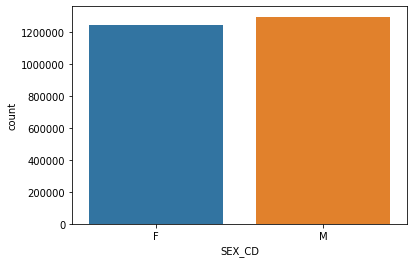

In [17]:
sns.countplot(dt_card_resident['SEX_CD'])
plt.show()

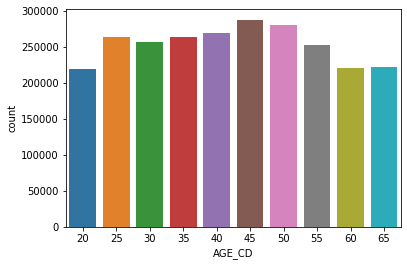

In [18]:
sns.countplot(dt_card_resident['AGE_CD'])
plt.show()

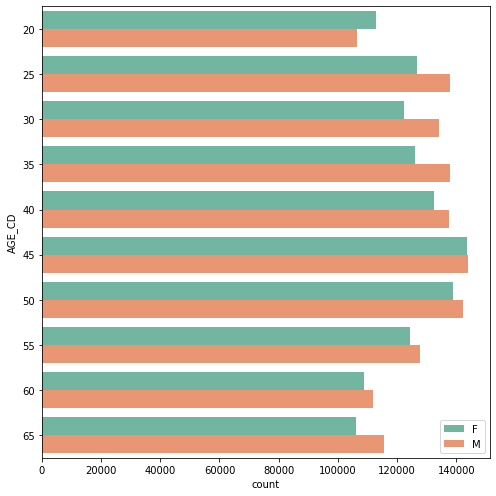

In [19]:
plt.figure(figsize=(7, 7))
sns.countplot(y = dt_card_resident['AGE_CD'], palette="Set2", hue=dt_card_resident['SEX_CD'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

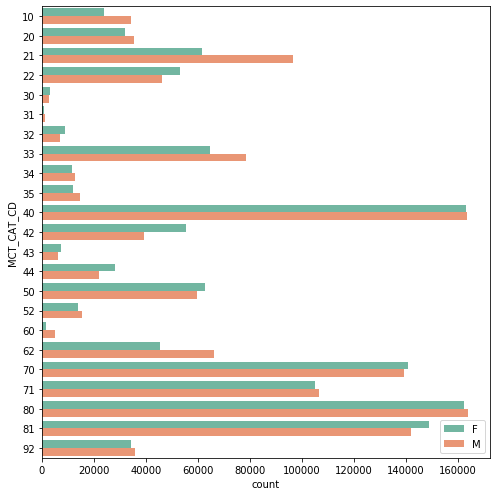

In [33]:
plt.figure(figsize=(7, 7))
sns.countplot(y = dt_card_resident['MCT_CAT_CD'], palette="Set2", hue=dt_card_resident['SEX_CD'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

## 위 그래프에서 21법 업종을 이용하는 남성의 수가 많은것을 알 수 있음

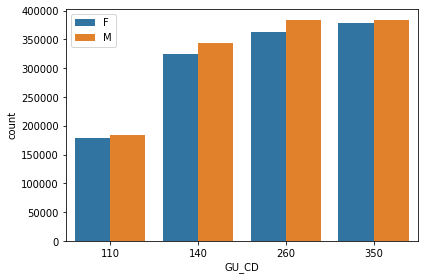

In [21]:
sns.countplot(dt_card_resident['GU_CD'], hue=dt_card_resident['SEX_CD'])
plt.legend(loc=2)
plt.tight_layout()
plt.show()

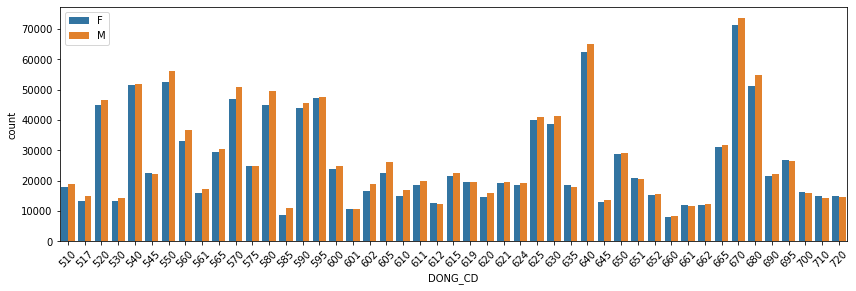

In [22]:
plt.figure(figsize=(12, 4))
sns.countplot(dt_card_resident['DONG_CD'], hue=dt_card_resident['SEX_CD'])
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [23]:
dt_card_resident[dt_card_resident['MCT_CAT_CD'] == 21].AGE_CD

7          50
8          20
9          25
10         30
11         35
           ..
2537639    20
2537640    25
2537641    30
2537642    50
2537643    55
Name: AGE_CD, Length: 158288, dtype: int64

In [31]:
dt_card_resident[(dt_card_resident['MCT_CAT_CD'] == 21) & (dt_card_resident['SEX_CD'] == 'M')]

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
8,20190201,110,517,21,M,20,5,43
9,20190201,110,517,21,M,25,16,103
10,20190201,110,517,21,M,30,11,184
11,20190201,110,517,21,M,35,27,622
12,20190201,110,517,21,M,40,11,238
...,...,...,...,...,...,...,...,...
2537639,20200531,350,720,21,M,20,14,178
2537640,20200531,350,720,21,M,25,9,360
2537641,20200531,350,720,21,M,30,5,56
2537642,20200531,350,720,21,M,50,5,168


In [29]:
data_21M = dt_card_resident[(dt_card_resident['MCT_CAT_CD'] == 21) & (dt_card_resident['SEX_CD'] == 'M')]

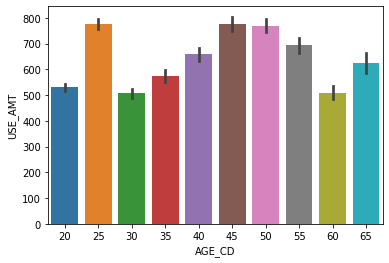

In [30]:
sns.barplot(data = data_21M, x='AGE_CD', y='USE_AMT')
plt.show()

C:\Users\mm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  fon

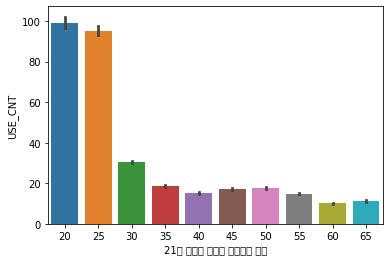

In [37]:
sns.barplot(data = data_21M, x='AGE_CD', y='USE_CNT')
plt.xlabel('21번 업종을 이용한 나이대별 남성')
plt.show()